## Import packages

In [1]:
import cv2
import imutils
import matplotlib.pyplot as plt

## Function declaration

Jupyter Notebook 및 Google Colab에서 이미지를 표시할 수 있도록 Function으로 정의

In [2]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

Shape 을 판단하는 Function

In [3]:
def shape_label(c):
    shape = "unidentified"
    # cv2.arcLength를 이용해 윤곽선의 전체 길이를 계산
    peri = cv2.arcLength(c, True)
    # cv2.approxPolyDP를 활용해 윤곽선의 근사 다각형 검출
    approx_poly = cv2.approxPolyDP(c, 0.04 * peri, True)
    
    # 꼭지점이 3개이면 삼각형
    if len(approx_poly) == 3:
        shape = "triangle"
    # 꼭지점이 4개이면 사각형
    elif len(approx_poly) == 4:
        # 종횡비를 구해서 정사각형 판단
        (x, y, w, h) = cv2.boundingRect(approx_poly)
        ar = w / float(h)
        
        if ar >= 0.95 and ar <= 1.05:
            shape = "square"  
        else:
            shape = "rectangle"
    # 꼭지점이 5개이면 오각형
    elif len(approx_poly) == 5:
        shape = "pentagon"
    # 꼭지점이 6개이면 육각형
    elif len(approx_poly) == 6:
        shape = "hexagon"
    # 나머지는 원으로 판단
    else:
        shape = "circle"
        
    return shape

## Load Image

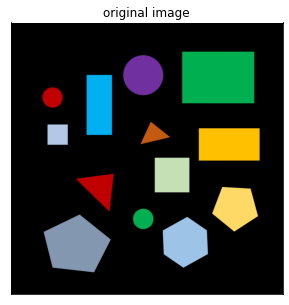

In [4]:
cv2_image = cv2.imread('asset/images/shape.jpg', cv2.IMREAD_COLOR)
img_show('original image', cv2_image)

## Shape Detection
아래 과정을 통해 이미지를 그레이스케일로 변환하고 노이즈를 줄이기 위한 이미지 블러링 후 이진화 합니다.

In [5]:
resized = imutils.resize(cv2_image, width=640)
ratio = cv2_image.shape[0] / float(resized.shape[0])
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 10, 255, cv2.THRESH_BINARY)[1]

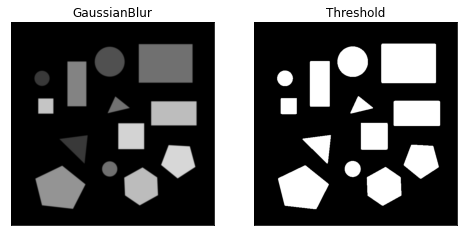

In [6]:
img_show(['GaussianBlur', 'Threshold'], [blurred, thresh])

이진화 이미지에서 윤곽선을 검출합니다.

In [7]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

추출된 윤곽선을 기준으로 Shape을 판단하여 이미지에 표시합니다.

In [8]:
vis = cv2_image.copy()

for c in cnts:
    # cv2.moments를 이용하여 객체의 중심을 계산
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    shape = shape_label(c)
    
    # 이미지에서 객체의 윤곽선과 Shape명을 표시
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    cv2.drawContours(vis, [c], -1, (0, 255, 0), 10)
    cv2.circle(vis, (cX, cY), 20, (0, 255, 0), -1); 
    cv2.putText(vis, shape, (cX-80, cY-50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 5)

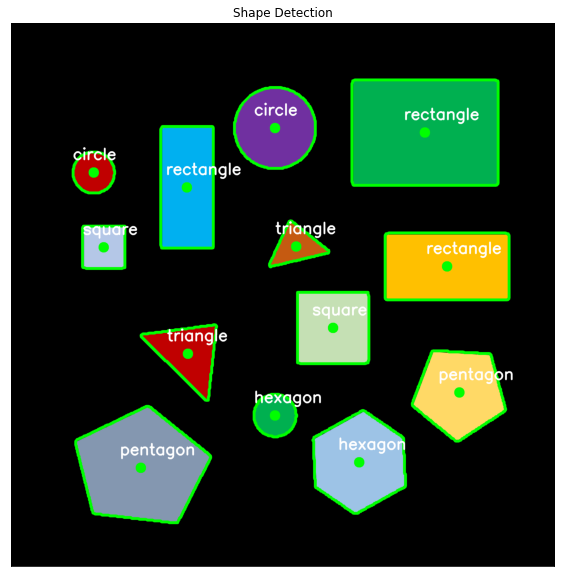

In [9]:
img_show('Shape Detection', vis, figsize=(16,10))